## Section 1:

In [2]:
set.seed(51)
options(repr.plot.width = 12, repr.plot.height = 6)

exponential_distribution <- function(rate, num_samples) {# + duration as argument
  return (rexp(num_samples, rate))

  # If duration was added the code will be as the following:

  # arrival_times <- rexp(num_samples, rate)
  # valid_arrivals <- c()

  # shift_duration <- 0
  # i <- 1
  # while (shift_duration <= duration && i <= length(arrival_times)) {
  #   shift_duration <- shift_duration + arrival_times[i]
  #   valid_arrivals <- c(valid_arrivals, arrival_times[i])
  #   i <- i + 1
  # }
  # return(valid_arrivals)
}


## Section 2:

In [3]:
inter_arrival_times_above_12mins <- function(inter_arrival_times) {
  times_beyond_threshold <- inter_arrival_times[inter_arrival_times > 12] - 12
  return(times_beyond_threshold)
}

## Section 3:

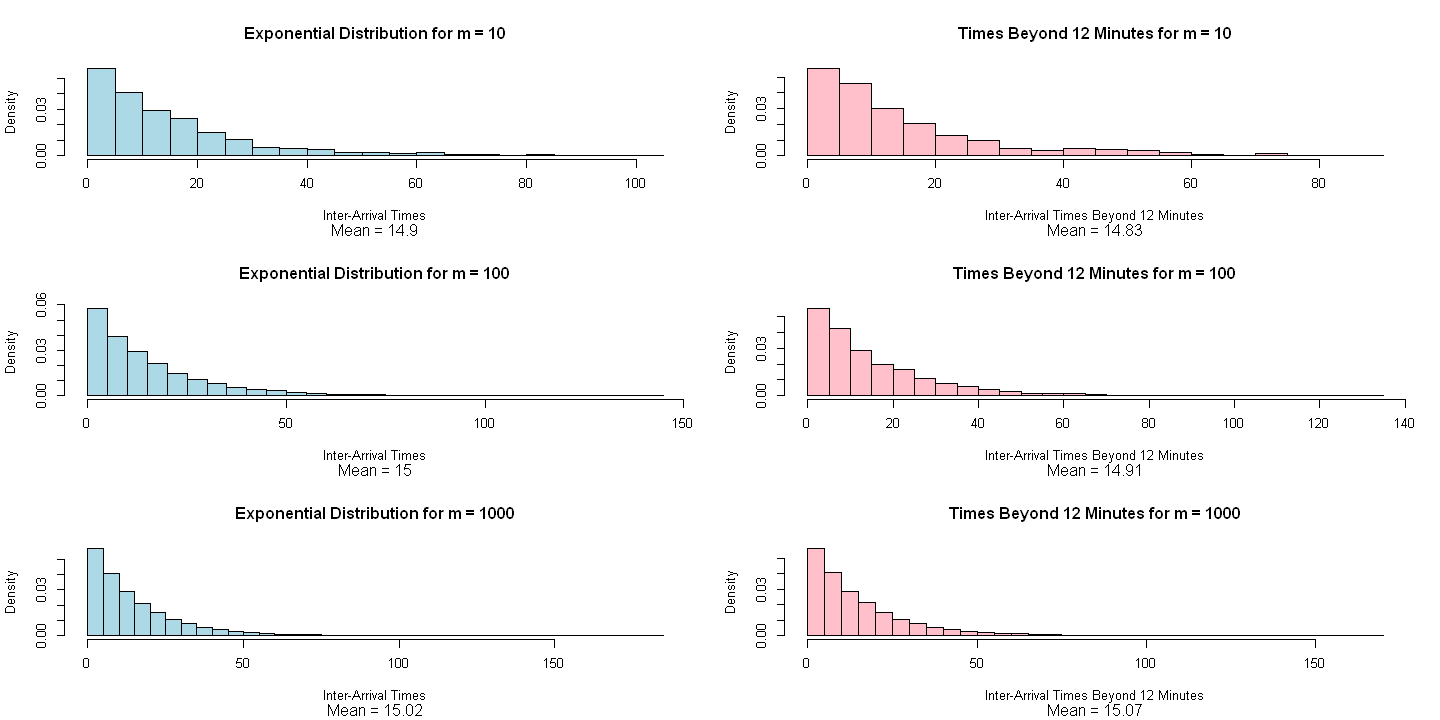

In [4]:
rate <- 1/15
m_values <- c(10, 100, 1000)

par(mfrow = c(3, 2), bg = "white")
for (m in m_values) {
        num_samples <- 100 * m
        inter_arrival_times <- exponential_distribution(rate, num_samples)
        times_beyond_threshold <- inter_arrival_times_above_12mins(inter_arrival_times)

        mean_exp <- mean(inter_arrival_times)
        mean_threshold <- mean(times_beyond_threshold)

        hist(inter_arrival_times, main = paste("Exponential Distribution for m =", m),
                xlab = "Inter-Arrival Times", col = "lightblue", border = "black", breaks = 30, probability=TRUE)
        mtext(paste("Mean =", round(mean_exp, 2)), side = 1, line = 4, cex = 0.8)

        hist(times_beyond_threshold, main = paste("Times Beyond 12 Minutes for m =", m),
                xlab = "Inter-Arrival Times Beyond 12 Minutes", col = "pink", border = "black", breaks = 30, probability=TRUE)
        mtext(paste("Mean =", round(mean_threshold, 2)), side = 1, line = 4, cex = 0.8)
}

## Section 4:

Analyzing the histograms for times exceeding 12 minutes, the shape remains consistent with what is observed in the original exponential distribution. This suggests that, even after waiting for 12 minutes, the probability of waiting an additional amount of time does not depend on the 12 minutes already passed. Instead, the distribution of these additional waiting times mirrors the original distribution.

**Conclusion:**
The probability of the next event (customer arrival) is not influenced by the time already spent waiting (12 minutes in this case).

## Section 5:

In [5]:
num_samples <- 1000 * 100
inter_arrival_times <- exponential_distribution(rate, num_samples)
times_beyond_12 <- inter_arrival_times_above_12mins(inter_arrival_times)

count <- 0
total <- length(times_beyond_12)
for (t in times_beyond_12) {
    if (t <= 3) { # 15 - 12 = 3
        count <- count + 1
    }
}
empirical_probability <- count / total
cat("Empirical Probability: ", empirical_probability, "\n")


theoretical_probability <- pexp(3, rate)
cat("Theoretical Probability (P(t <= 3)): ", theoretical_probability, "\n")


Empirical Probability:  0.1810872 
Theoretical Probability (P(t <= 3)):  0.1812692 


The empirical probability obtained from the simulated data closely match the theoretical probability calculated using the exponential distribution formula. This demonstrates the memoryless property of the exponential distribution, where the waiting time for the next customer remains independent of the time already elapsed.